In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('CollegeRookieStatLog2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9
5,Brandon Armstrong,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,18.1,2.56,2002,SG,21,0.5,0.2,0.2,0.0,1.8
6,Carlos Arroyo,Florida International,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,16.0,-1.88,2002,PG,22,1.1,1.9,0.3,0.0,3.0
7,Shane Battier,Duke,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,13.6,10.08,2002,SF,23,5.4,2.8,1.6,1.0,14.4
8,Charlie Bell,Michigan State,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,10.5,9.90,2002,SG,22,0.7,0.3,0.0,0.0,1.1
9,Ruben Boumtje-Boumtje,Georgetown,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,9.6,4.94,2002,C,23,1.7,0.1,0.1,0.5,1.2


In [3]:
dfend = pd.read_csv('2019DraftClass.csv')
dfend

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97
5,Charles Bassey,Western Kentucky,34,34,31.4,5.5,8.8,0.627,5.3,8.2,...,2.9,7.1,10.0,0.7,0.8,2.4,2.9,2.6,14.6,0.96
6,Tyus Battle,Syracuse,103,94,35.4,5.3,12.8,0.417,3.6,7.6,...,0.5,2.3,2.8,2.1,1.3,0.2,1.8,2.0,16.0,9.52
7,Phil Bledsoe,Marshall,35,0,7.3,1.0,2.4,0.422,0.7,1.5,...,0.7,1.1,1.8,0.1,0.1,0.0,0.2,0.9,2.8,-0.31
8,Bol Bol,Oregon,9,9,29.8,8.2,14.7,0.561,6.8,11.9,...,2.1,7.4,9.6,1.0,0.8,2.7,2.0,1.7,21.0,6.13
9,Marques Bolden,Duke,88,24,13.6,1.5,2.6,0.573,1.5,2.5,...,1.4,1.9,3.3,0.4,0.3,1.1,0.6,1.6,3.8,10.86


In [4]:
dfend.columns

Index(['Name', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS'],
      dtype='object')

In [5]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
for col in cols_at_end:
    dfend[col] = 0
print(len(df))
print(len(dfend))

860
117


In [6]:
dfend.columns

Index(['Name', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'NBATRB', 'NBAAST',
       'NBASTL', 'NBABLK', 'NBAPTS'],
      dtype='object')

In [7]:
df1 = df.append(dfend, ignore_index = True, sort=False)
df1

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990.0,SF,22.0,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996.0,PF,24.0,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998.0,SG,22.0,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000.0,SF,23.0,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002.0,PG,20.0,2.8,3.7,1.5,0.2,10.9
5,Brandon Armstrong,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,18.1,2.56,2002.0,SG,21.0,0.5,0.2,0.2,0.0,1.8
6,Carlos Arroyo,Florida International,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,16.0,-1.88,2002.0,PG,22.0,1.1,1.9,0.3,0.0,3.0
7,Shane Battier,Duke,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,13.6,10.08,2002.0,SF,23.0,5.4,2.8,1.6,1.0,14.4
8,Charlie Bell,Michigan State,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,10.5,9.90,2002.0,SG,22.0,0.7,0.3,0.0,0.0,1.1
9,Ruben Boumtje-Boumtje,Georgetown,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,9.6,4.94,2002.0,C,23.0,1.7,0.1,0.1,0.5,1.2


In [8]:
df1.columns

Index(['Name', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'Year', 'Pos', 'Age',
       'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'],
      dtype='object')

In [9]:
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990.0,SF,22.0,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996.0,PF,24.0,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998.0,SG,22.0,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000.0,SF,23.0,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002.0,PG,20.0,2.8,3.7,1.5,0.2,10.9
5,Brandon Armstrong,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,18.1,2.56,2002.0,SG,21.0,0.5,0.2,0.2,0.0,1.8
6,Carlos Arroyo,Florida International,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,16.0,-1.88,2002.0,PG,22.0,1.1,1.9,0.3,0.0,3.0
7,Shane Battier,Duke,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,13.6,10.08,2002.0,SF,23.0,5.4,2.8,1.6,1.0,14.4
8,Charlie Bell,Michigan State,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,10.5,9.90,2002.0,SG,22.0,0.7,0.3,0.0,0.0,1.1
9,Ruben Boumtje-Boumtje,Georgetown,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,9.6,4.94,2002.0,C,23.0,1.7,0.1,0.1,0.5,1.2


In [10]:
df1 = df1.replace({'Pos': po_dict})
df1

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990.0,0.0,22.0,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996.0,1.0,24.0,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998.0,2.0,22.0,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000.0,0.0,23.0,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002.0,3.0,20.0,2.8,3.7,1.5,0.2,10.9
5,Brandon Armstrong,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,18.1,2.56,2002.0,2.0,21.0,0.5,0.2,0.2,0.0,1.8
6,Carlos Arroyo,Florida International,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,16.0,-1.88,2002.0,3.0,22.0,1.1,1.9,0.3,0.0,3.0
7,Shane Battier,Duke,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,13.6,10.08,2002.0,0.0,23.0,5.4,2.8,1.6,1.0,14.4
8,Charlie Bell,Michigan State,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,10.5,9.90,2002.0,2.0,22.0,0.7,0.3,0.0,0.0,1.1
9,Ruben Boumtje-Boumtje,Georgetown,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,9.6,4.94,2002.0,4.0,23.0,1.7,0.1,0.1,0.5,1.2


In [11]:
df1.columns

Index(['Name', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'Year', 'Pos', 'Age',
       'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'],
      dtype='object')

In [12]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,1,0,0,0,0,0,0,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,1,0,0,0,0,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,1,0,0,0,0,0,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,1,0,0,0,0,0,0,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0
5,Brandon Armstrong,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,2.6,0,0,1,0,0,0,0,0,0
6,Carlos Arroyo,Florida International,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,1.0,0,0,0,1,0,0,0,0,0
7,Shane Battier,Duke,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,1.6,1,0,0,0,0,0,0,0,0
8,Charlie Bell,Michigan State,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,0.4,0,0,1,0,0,0,0,0,0
9,Ruben Boumtje-Boumtje,Georgetown,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,2.6,0,0,0,0,1,0,0,0,0


In [13]:
df1.columns

Index([  'Name', 'School',      'G',     'GS',     'MP',     'FG',    'FGA',
          'FG%',     '2P',    '2PA',    '2P%',     '3P',    '3PA',    '3P%',
           'FT',    'FTA',    'FT%',    'ORB',    'DRB',    'TRB',    'AST',
          'STL',    'BLK',    'TOV',    'PTS',    'SOS',   'Year',    'Age',
       'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS',  'Fouls',      0.0,
            1.0,      2.0,      3.0,      4.0,      5.0,      6.0,      7.0,
            8.0],
      dtype='object')

In [14]:
df1['C'] = df1[4.0] + df1[5.0]
df1['PG'] = df1[3.0] + df1[6.0]
df1['SF'] = df1[0.0] + df1[7.0]
df1['SG'] = df1[2.0] + df1[8.0]
df1['PF'] = df1[1.0]
df1 = df1.drop([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], axis=1)
df1

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PG,SF,SG,PF
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,1,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,0,0,0,1
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,1,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,1,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,1,0,0,0
5,Brandon Armstrong,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,0.2,0.2,0.0,1.8,2.6,0,0,0,1,0
6,Carlos Arroyo,Florida International,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,1.9,0.3,0.0,3.0,1.0,0,1,0,0,0
7,Shane Battier,Duke,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,2.8,1.6,1.0,14.4,1.6,0,0,1,0,0
8,Charlie Bell,Michigan State,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,0.3,0.0,0.0,1.1,0.4,0,0,0,1,0
9,Ruben Boumtje-Boumtje,Georgetown,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,0.1,0.1,0.5,1.2,2.6,1,0,0,0,0


In [15]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PG,SF,SG,PF
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,1,0,0
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,0,0,0,1
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,1,0
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,1,0,0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,1,0,0,0


In [16]:
df1

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PG,SF,SG,PF
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,1,0,0
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,0,0,0,1
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,1,0
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,1,0,0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,1,0,0,0
5,Brandon Armstrong,5,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,...,0.2,0.2,0.0,1.8,2.6,0,0,0,1,0
6,Carlos Arroyo,6,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,...,1.9,0.3,0.0,3.0,1.0,0,1,0,0,0
7,Shane Battier,7,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,...,2.8,1.6,1.0,14.4,1.6,0,0,1,0,0
8,Charlie Bell,8,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,...,0.3,0.0,0.0,1.1,0.4,0,0,0,1,0
9,Ruben Boumtje-Boumtje,9,101.0,33.0,25.1,3.4,7.0,0.485,3.4,7.0,...,0.1,0.1,0.5,1.2,2.6,1,0,0,0,0


In [17]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PG,SF,SG,PF
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0.3,0.2,0.2,1.3,1.0,0,0,1,0,0
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,0.6,0.4,0.2,6.3,3.3,0,0,0,0,1
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0.0,0.1,0.1,2.7,2.4,0,0,0,1,0
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0.5,0.7,0.4,7.0,1.4,0,0,1,0,0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,3.7,1.5,0.2,10.9,2.4,0,1,0,0,0
Brandon Armstrong,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,0.467,2.2,...,0.2,0.2,0.0,1.8,2.6,0,0,0,1,0
Carlos Arroyo,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,0.516,1.7,...,1.9,0.3,0.0,3.0,1.0,0,1,0,0,0
Shane Battier,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,0.570,1.7,...,2.8,1.6,1.0,14.4,1.6,0,0,1,0,0
Charlie Bell,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,0.481,0.9,...,0.3,0.0,0.0,1.1,0.4,0,0,0,1,0


In [18]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0,0,1,0,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,0,0,0,0,1,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0,0,0,1,0,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0,0,1,0,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0,1,0,0,0,2.8,3.7,1.5,0.2,10.9
Brandon Armstrong,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,0.467,2.2,...,0,0,0,1,0,0.5,0.2,0.2,0.0,1.8
Carlos Arroyo,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,0.516,1.7,...,0,1,0,0,0,1.1,1.9,0.3,0.0,3.0
Shane Battier,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,0.570,1.7,...,0,0,1,0,0,5.4,2.8,1.6,1.0,14.4
Charlie Bell,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,0.481,0.9,...,0,0,0,1,0,0.7,0.3,0.0,0.0,1.1


In [19]:
df1.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', 'SOS', 'Year', 'Age', 'Fouls', 'C', 'PG', 'SF', 'SG',
       'PF', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'],
      dtype='object')

In [20]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [21]:
df1

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0,0,1,0,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,0,0,0,0,1,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0,0,0,1,0,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0,0,1,0,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0,1,0,0,0,2.8,3.7,1.5,0.2,10.9
Brandon Armstrong,65.0,30.0,30.4,6.6,15.1,0.439,4.4,9.5,0.467,2.2,...,0,0,0,1,0,0.5,0.2,0.2,0.0,1.8
Carlos Arroyo,100.0,29.0,35.2,5.6,12.6,0.445,3.9,7.5,0.516,1.7,...,0,1,0,0,0,1.1,1.9,0.3,0.0,3.0
Shane Battier,146.0,39.0,31.4,4.5,8.9,0.500,2.8,4.9,0.570,1.7,...,0,0,1,0,0,5.4,2.8,1.6,1.0,14.4
Charlie Bell,140.0,33.0,27.0,3.7,8.5,0.439,2.8,5.9,0.481,0.9,...,0,0,0,1,0,0.7,0.3,0.0,0.0,1.1


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [23]:
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868249,-1.939061,-3.511467,-2.441608,-2.409056,-0.150106,-1.924850,-2.062831,-0.045395,-1.040801,...,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,-0.907670,-0.569999,-0.549756,-0.067611,-0.780973
Ashraf Amaya,0.992793,1.518576,0.817920,0.689199,0.018795,1.633709,1.410334,1.020801,1.285513,-1.172349,...,-0.322420,-0.512127,-0.429235,-0.556463,2.090008,2.003705,-0.329511,-0.018225,-0.067611,0.488806
James Cotton,-1.990349,-1.909759,-2.597071,-2.665237,-2.580031,-0.548434,-2.002412,-2.062831,-0.813948,-1.303896,...,-0.322420,-0.512127,-0.429235,1.797064,-0.478467,-0.739706,-0.810486,-0.815522,-0.411650,-0.425434
Eddie Robinson,0.609637,0.199985,0.892565,-1.919807,-1.519984,-1.864648,-1.459475,-1.175759,-2.051130,-0.909254,...,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,0.380054,-0.409674,0.779071,0.620468,0.666576
Gilbert Arenas,-0.594567,-1.030699,0.500680,0.912828,0.942062,-0.115469,0.557147,0.556144,0.198292,0.669317,...,-0.322420,1.952641,-0.429235,-0.556463,-0.478467,0.436042,2.155525,2.905194,-0.067611,1.657003
Brandon Armstrong,-0.731408,-1.118605,0.482019,1.658258,1.967915,-0.583071,0.789835,1.232009,-0.851438,1.590150,...,-0.322420,-0.512127,-0.429235,1.797064,-0.478467,-0.851682,-0.650161,-0.549756,-0.755689,-0.653995
Carlos Arroyo,0.226482,-1.147907,1.377755,0.912828,1.113038,-0.479160,0.402023,0.387178,0.067076,0.932413,...,-0.322420,1.952641,-0.429235,-0.556463,-0.478467,-0.515754,0.712601,-0.283991,-0.755689,-0.349248
Shane Battier,1.485422,-0.854887,0.668631,0.092854,-0.152180,0.473363,-0.451164,-0.711102,1.079316,0.932413,...,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,1.891729,1.434063,3.170959,2.684703,2.545849
Charlie Bell,1.321212,-1.030699,-0.152460,-0.503490,-0.288961,-0.583071,-0.451164,-0.288687,-0.589006,-0.119968,...,-0.322420,-0.512127,-0.429235,1.797064,-0.478467,-0.739706,-0.569999,-1.081287,-0.755689,-0.831764


In [24]:
df3 = df1[0:860]
df4 = df1[867:]

In [25]:
df3

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868249,-1.939061,-3.511467,-2.441608,-2.409056,-0.150106,-1.924850,-2.062831,-0.045395,-1.040801,...,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,-0.907670,-0.569999,-0.549756,-0.067611,-0.780973
Ashraf Amaya,0.992793,1.518576,0.817920,0.689199,0.018795,1.633709,1.410334,1.020801,1.285513,-1.172349,...,-0.322420,-0.512127,-0.429235,-0.556463,2.090008,2.003705,-0.329511,-0.018225,-0.067611,0.488806
James Cotton,-1.990349,-1.909759,-2.597071,-2.665237,-2.580031,-0.548434,-2.002412,-2.062831,-0.813948,-1.303896,...,-0.322420,-0.512127,-0.429235,1.797064,-0.478467,-0.739706,-0.810486,-0.815522,-0.411650,-0.425434
Eddie Robinson,0.609637,0.199985,0.892565,-1.919807,-1.519984,-1.864648,-1.459475,-1.175759,-2.051130,-0.909254,...,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,0.380054,-0.409674,0.779071,0.620468,0.666576
Gilbert Arenas,-0.594567,-1.030699,0.500680,0.912828,0.942062,-0.115469,0.557147,0.556144,0.198292,0.669317,...,-0.322420,1.952641,-0.429235,-0.556463,-0.478467,0.436042,2.155525,2.905194,-0.067611,1.657003
Brandon Armstrong,-0.731408,-1.118605,0.482019,1.658258,1.967915,-0.583071,0.789835,1.232009,-0.851438,1.590150,...,-0.322420,-0.512127,-0.429235,1.797064,-0.478467,-0.851682,-0.650161,-0.549756,-0.755689,-0.653995
Carlos Arroyo,0.226482,-1.147907,1.377755,0.912828,1.113038,-0.479160,0.402023,0.387178,0.067076,0.932413,...,-0.322420,1.952641,-0.429235,-0.556463,-0.478467,-0.515754,0.712601,-0.283991,-0.755689,-0.349248
Shane Battier,1.485422,-0.854887,0.668631,0.092854,-0.152180,0.473363,-0.451164,-0.711102,1.079316,0.932413,...,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,1.891729,1.434063,3.170959,2.684703,2.545849
Charlie Bell,1.321212,-1.030699,-0.152460,-0.503490,-0.288961,-0.583071,-0.451164,-0.288687,-0.589006,-0.119968,...,-0.322420,-0.512127,-0.429235,1.797064,-0.478467,-0.739706,-0.569999,-1.081287,-0.755689,-0.831764


In [26]:
df4

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Phil Bledsoe,-1.552456,-1.997665,-3.828707,-2.516151,-2.374861,-0.877487,-2.079975,-2.147314,-0.757712,-0.909254,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Bol Bol,-2.264031,-1.733947,0.370052,2.850946,1.831135,1.529798,2.651333,2.245806,1.079316,0.537770,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Marques Bolden,-0.101938,-1.294417,-2.653054,-2.143436,-2.306471,1.737621,-1.459475,-1.724899,1.472965,-1.303896,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Jordan Bone,0.089640,0.551609,-0.320410,-0.578033,-0.323156,-0.842850,-0.606289,-0.373170,-1.020145,0.011579,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Ky Bowman,0.171745,0.756723,1.433738,1.136457,1.454989,-0.686983,0.169335,0.513903,-0.870183,1.721698,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
DaQuan Bracey,-0.074569,0.082777,0.071474,0.092854,0.292356,-0.548434,0.014211,0.175970,-0.457789,0.143127,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Keith Braxton,0.171745,0.727421,1.191143,0.763742,0.600112,0.213584,0.712272,0.640627,0.254528,0.143127,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Ignas Brazdeikis,-1.497720,-0.913491,0.332730,0.540113,0.565916,-0.184744,0.169335,0.218212,-0.232847,0.669317,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115
Oshae Brissett,-0.567198,0.082777,1.471060,0.018311,0.805282,-1.760736,-0.140914,0.513903,-2.032385,0.274675,...,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,-1.131622,-0.810486,-1.081287,-0.755689,-1.111115


In [27]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [28]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [29]:
test_y.tail()

,Age,Fouls,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,
Julian Washburn,2.603337,-0.779350,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,0.156102,-0.169186,0.779071,-0.411650,-0.552412
Yuta Watanabe,0.975857,-0.779350,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,0.044126,-0.409674,-0.283991,-0.411650,-0.450830
Thomas Welsh,-0.109129,0.626976,3.101542,-0.512127,-0.429235,-0.556463,-0.478467,-0.907670,-0.409674,-1.081287,-0.755689,-0.704786
Kenrich Williams,0.975857,0.626976,-0.322420,-0.512127,2.329728,-0.556463,-0.478467,1.555801,0.632438,1.576367,0.620468,0.438015
Trae Young,-1.194116,-0.779350,-0.322420,1.952641,-0.429235,-0.556463,-0.478467,0.939933,5.682674,1.310601,-0.067611,3.739441


In [30]:
test_y = test_y.drop(['Age','Fouls','C','PF','PG','SF','SG'],axis=1)

In [31]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Julian Washburn,0.156102,-0.169186,0.779071,-0.411650,-0.552412
Yuta Watanabe,0.044126,-0.409674,-0.283991,-0.411650,-0.450830
Thomas Welsh,-0.907670,-0.409674,-1.081287,-0.755689,-0.704786
Kenrich Williams,1.555801,0.632438,1.576367,0.620468,0.438015
Trae Young,0.939933,5.682674,1.310601,-0.067611,3.739441


In [32]:
# Correlation Matrix

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.133851;0.62x0.737297)


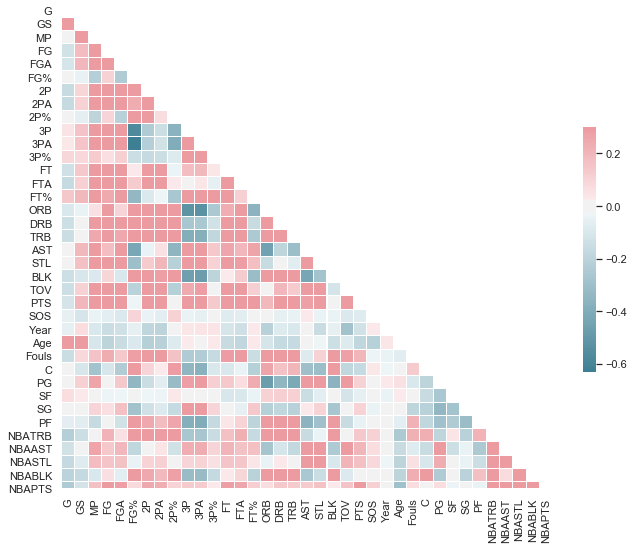

In [34]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [35]:
# Feature Selection

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 12)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True False  True False  True False  True  True  True False  True False
 False False False False False False  True  True False  True  True  True
 False]
[ 1 12  1  5  1  8  1  1  1  4  1 11 10  3  6  9 14  7  1  1  2  1  1  1
 13]


In [37]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,25):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FGA,2P,2PA,2P%,3PA,AST,STL,TOV,PTS,SOS
Name,,,,,,,,,,,,
Mike Higgins,-0.868249,-3.511467,-2.409056,-1.924850,-2.062831,-0.045395,-1.093473,-1.365429,-1.725965,-1.839443,-2.373863,-2.952167
Ashraf Amaya,0.992793,0.817920,0.018795,1.410334,1.020801,1.285513,-1.194631,-1.098611,0.099659,-0.160923,0.541552,-1.324248
James Cotton,-1.990349,-2.597071,-2.580031,-2.002412,-2.062831,-0.813948,-1.346367,-1.232020,-0.914577,-1.559689,-2.450584,-3.306063
Eddie Robinson,0.609637,0.892565,-1.519984,-1.459475,-1.175759,-2.051130,-0.840580,0.769116,-0.508882,1.237844,-1.862386,-3.262131
Gilbert Arenas,-0.594567,0.500680,0.942062,0.557147,0.556144,0.198292,0.727360,-0.031338,1.722435,0.958091,0.848438,1.211596


In [38]:
# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-0.19789643, -0.2902561 , -2.82955932,  0.6707984 ,  1.59625707,
       -0.08620902,  1.82609116,  0.22419392,  0.10545205, -0.14741156,
        0.58379794,  0.10048897])

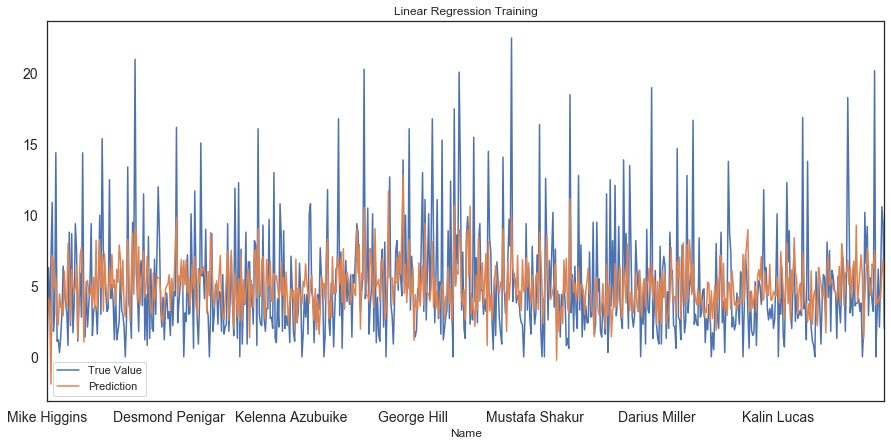

adj train r^2 = 0.19926902690373927
train mse = 11.419363687230058


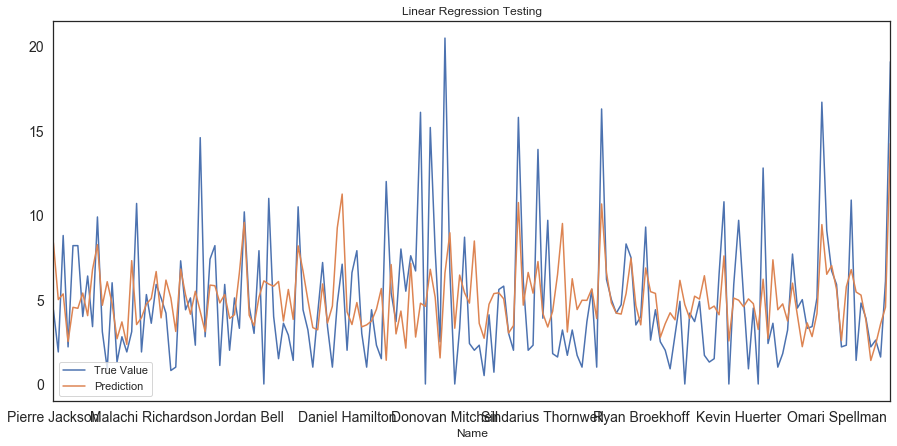

['G', 'MP', 'FGA', '2P', '2PA', '2P%', '3PA', 'AST', 'STL', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.22062648630396653
test mse = 11.654189070994871


In [40]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [41]:
# Extra Trees

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=1000,
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

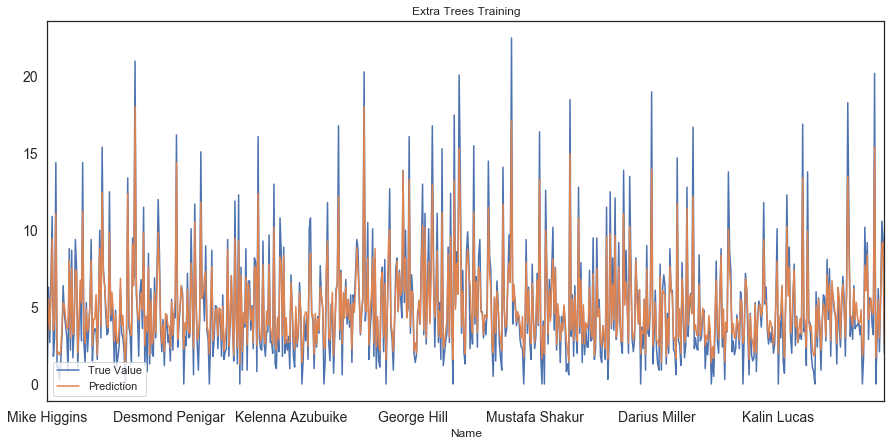

adj train r^2 = 0.8803905878430905
train mse = 1.7057706317441854


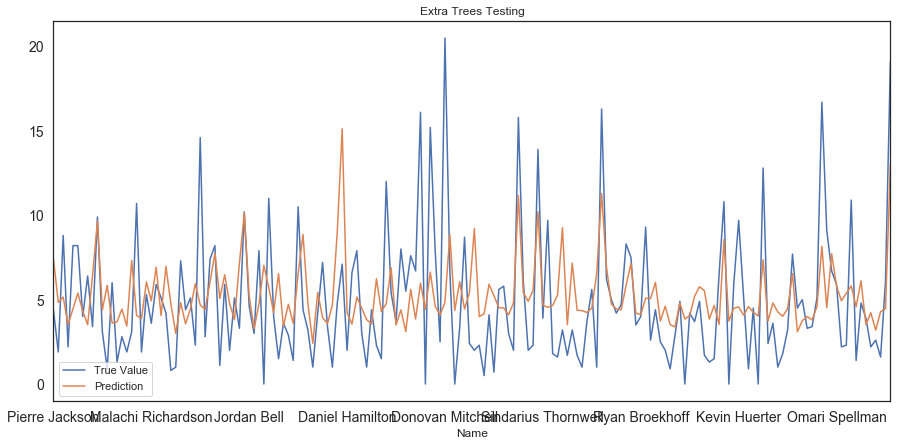

['G', 'MP', 'FGA', '2P', '2PA', '2P%', '3PA', 'AST', 'STL', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.1910433755923615
test mse = 12.096553559244189


In [43]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))


In [44]:
# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

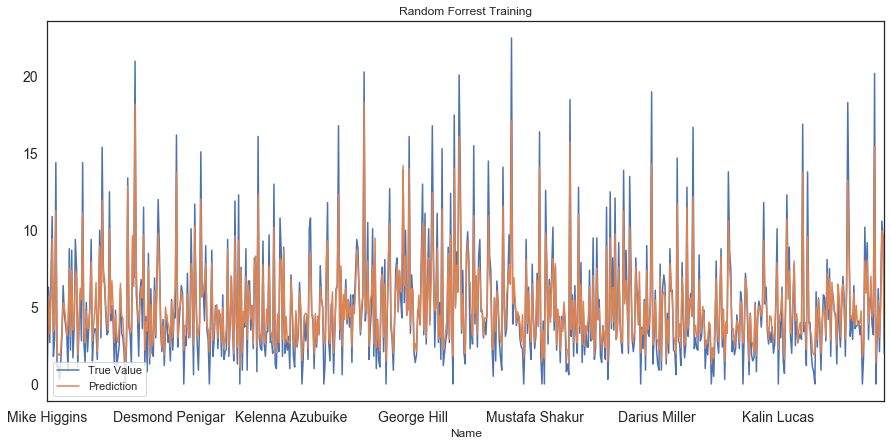

adj train r^2 = 0.8800790224414604
train mse = 1.7102139201308135


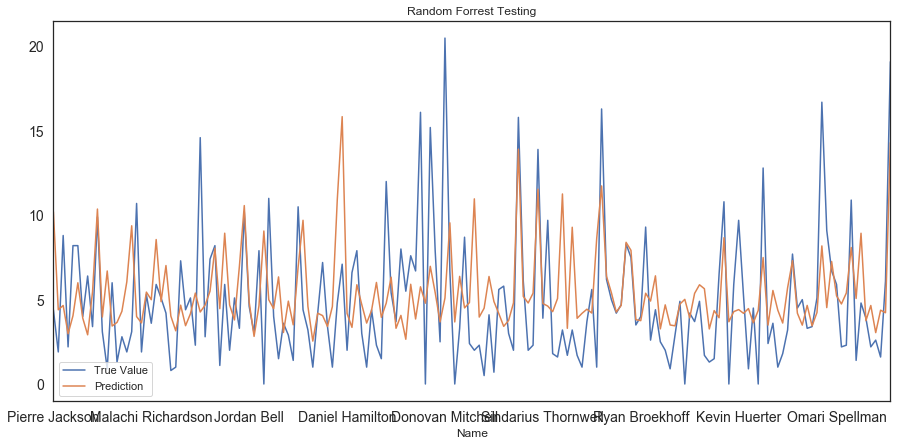

['G', 'MP', 'FGA', '2P', '2PA', '2P%', '3PA', 'AST', 'STL', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.11382321598466982
test mse = 13.251248098313974


In [46]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [47]:
# XGBoost

In [48]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [49]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values)

[01:06:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

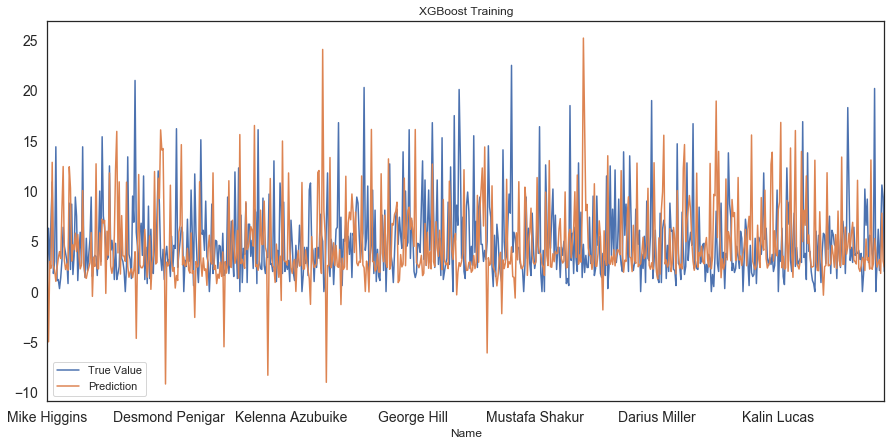

adj train r^2 = -1.1954119429589083
train mse = 31.309151590570863


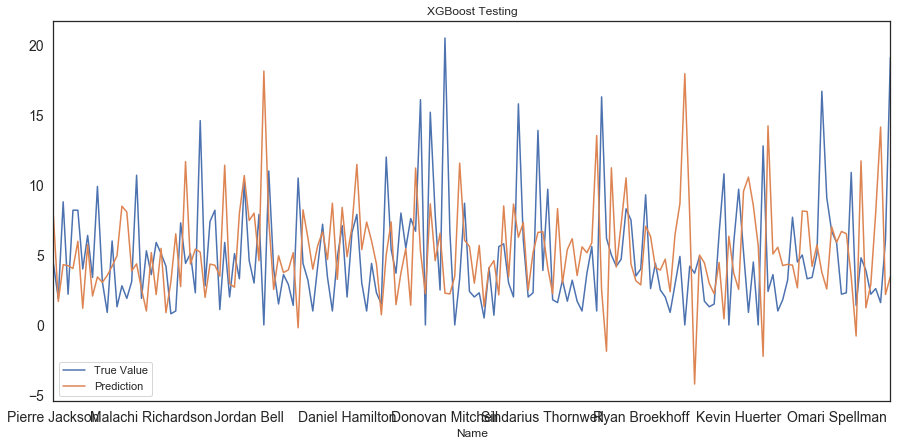

['G', 'MP', 'FGA', '2P', '2PA', '2P%', '3PA', 'AST', 'STL', 'TOV', 'PTS', 'SOS']
adj test r^2 = -0.9499755386188162
test mse = 29.158526959824254


In [50]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [51]:
# Feed Forward Neural Network

In [52]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [53]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=0,shuffle=False, callbacks=[early_stop])

W0822 01:06:45.086066 4570985920 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0822 01:06:45.087800 4570985920 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0822 01:06:45.258042 4570985920 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 01:06:45.261382 4570985920 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pac

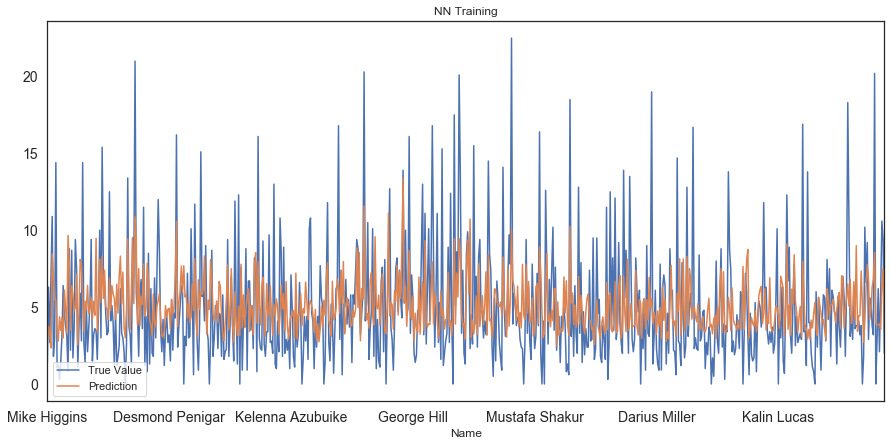

adj train r^2 = 0.21800506516966867
train mse = 11.152165786555388


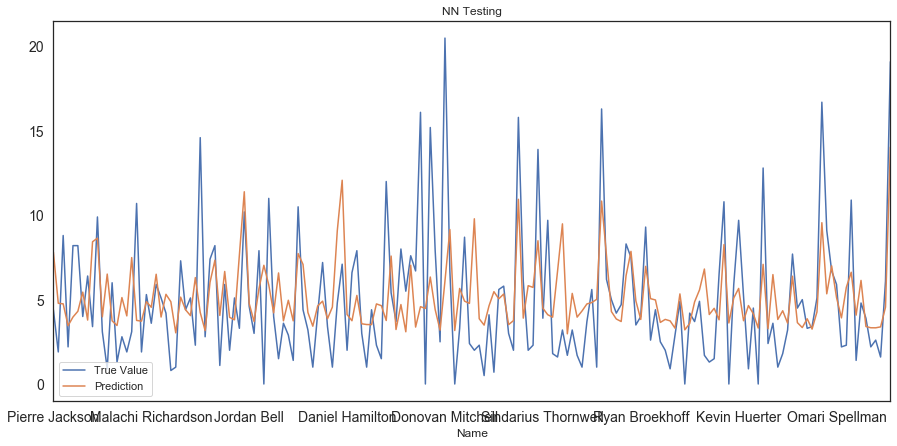

adj test r^2 = 0.2312512660066186
test mse = 11.49531378293797


In [54]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [55]:
# LSTM

In [56]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [57]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=0, shuffle=False, callbacks=[early_stop])

W0822 01:06:56.772587 4570985920 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Restoring model weights from the end of the best epoch
Epoch 00011: early stopping


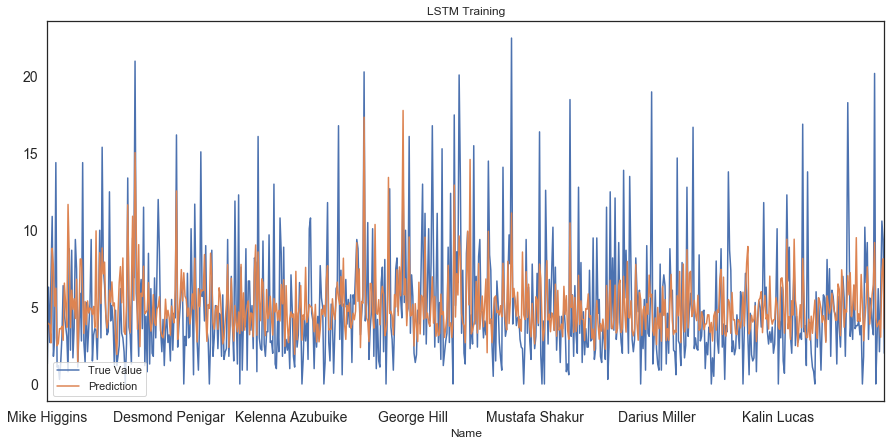

adj train r^2 = 0.24644944401912217
train mse = 10.746515552141119


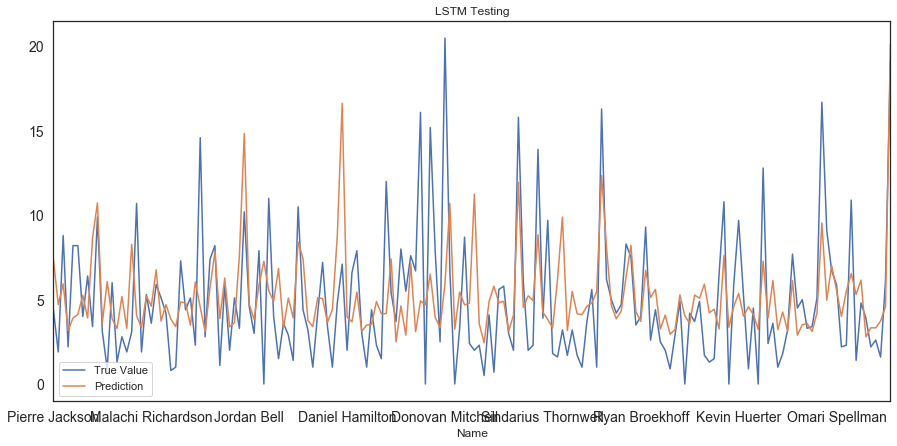

adj test r^2 = 0.21360364060428927
test mse = 11.759203637389778


In [58]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),trin_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [59]:
# TPOT

In [61]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

tpot = TPOTRegressor(population_size=5, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


0.5001286500000001 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(VarianceThreshold(RidgeCV(LinearSVR(input_matrix, C=1.0, dual=True, epsilon=0.1, loss=epsilon_insensitive, tol=0.1)), threshold=0.2), C=1.0, dual=True, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=1000000,
              max_eval_time_mins=5, max_time_mins=0.5, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=5,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=1, warm_start=False)

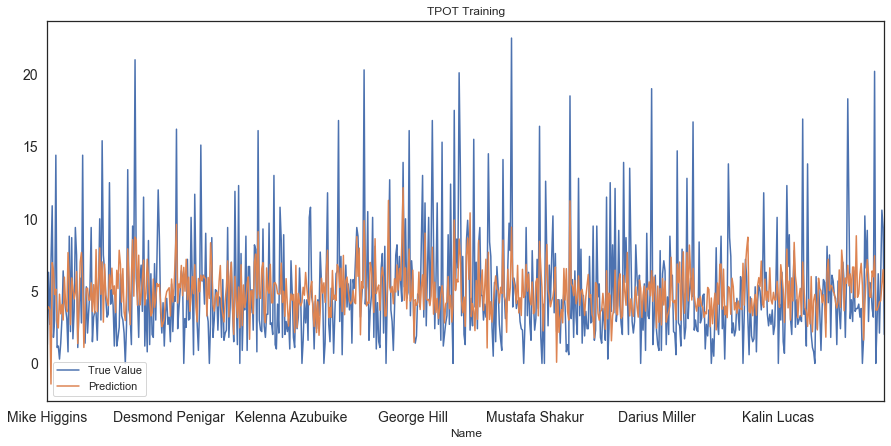

adj train r^2 = 0.19475163141452012
train mse = 11.483787050061865


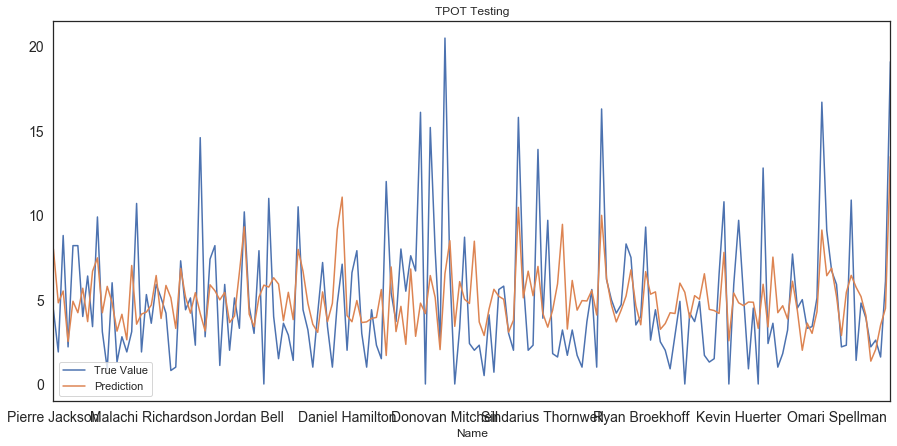

adj test r^2 = 0.2082518798848214
test mse = 11.839230004967527


In [62]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [63]:
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction
Name,,,,,,
Pierre Jackson,-0.515754,1.113413,-0.283991,-0.755689,4.4,8.007210
Damian Jones,0.156102,-0.810486,-0.815522,0.620468,1.9,4.811396
Skal Labissiere,1.611789,-0.169186,0.247540,0.620468,8.8,5.508942
Jake Layman,-0.739706,-0.569999,-0.283991,-0.411650,2.2,2.515286
Caris LeVert,0.715981,0.712601,1.310601,-0.411650,8.2,4.903684


In [64]:
# Differences

In [65]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Justin Patton,-1.131622,-0.810486,1.576367,-0.755689,2.0,8.462117,-6.462117
Derrick White,-0.291802,-0.409674,-0.549756,-0.067611,3.2,9.461796,-6.261796
Chris Boucher,-0.571742,-0.810486,-1.081287,-0.755689,0.0,5.859523,-5.859523
Tyler Davis,-0.571742,-0.810486,-1.081287,-0.755689,0.0,5.437682,-5.437682
Jacob Pullen,-1.131622,-0.810486,-1.081287,-0.755689,0.7,5.612744,-4.912744


In [66]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.939933,2.155525,2.905194,0.276429,20.5,6.537967,13.962033
Kyle Kuzma,2.395621,0.632438,0.513305,0.620468,16.1,4.792864,11.307136
Nikola Vucevic,4.691128,1.434063,1.576367,2.684703,14.6,4.176163,10.423837
Andre Ingram,0.548017,1.995201,2.905194,4.404900,12.0,1.691430,10.308570
Lauri Markkanen,3.067477,0.151464,0.513305,1.308546,15.2,6.426909,8.773091


In [67]:
# 2019 Predictions

In [68]:
df3.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868249,-1.939061,-3.511467,-2.441608,-2.409056,-0.150106,-1.924850,-2.062831,-0.045395,-1.040801,...,-0.32242,-0.512127,2.329728,-0.556463,-0.478467,-0.907670,-0.569999,-0.549756,-0.067611,-0.780973
Ashraf Amaya,0.992793,1.518576,0.817920,0.689199,0.018795,1.633709,1.410334,1.020801,1.285513,-1.172349,...,-0.32242,-0.512127,-0.429235,-0.556463,2.090008,2.003705,-0.329511,-0.018225,-0.067611,0.488806
James Cotton,-1.990349,-1.909759,-2.597071,-2.665237,-2.580031,-0.548434,-2.002412,-2.062831,-0.813948,-1.303896,...,-0.32242,-0.512127,-0.429235,1.797064,-0.478467,-0.739706,-0.810486,-0.815522,-0.411650,-0.425434
Eddie Robinson,0.609637,0.199985,0.892565,-1.919807,-1.519984,-1.864648,-1.459475,-1.175759,-2.051130,-0.909254,...,-0.32242,-0.512127,2.329728,-0.556463,-0.478467,0.380054,-0.409674,0.779071,0.620468,0.666576
Gilbert Arenas,-0.594567,-1.030699,0.500680,0.912828,0.942062,-0.115469,0.557147,0.556144,0.198292,0.669317,...,-0.32242,1.952641,-0.429235,-0.556463,-0.478467,0.436042,2.155525,2.905194,-0.067611,1.657003


In [69]:
train=df3
test=df4
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [70]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = ExtraTreesRegressor(n_estimators=100,bootstrap=True)
    rfe = RFE(model, 12)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df1.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,25):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

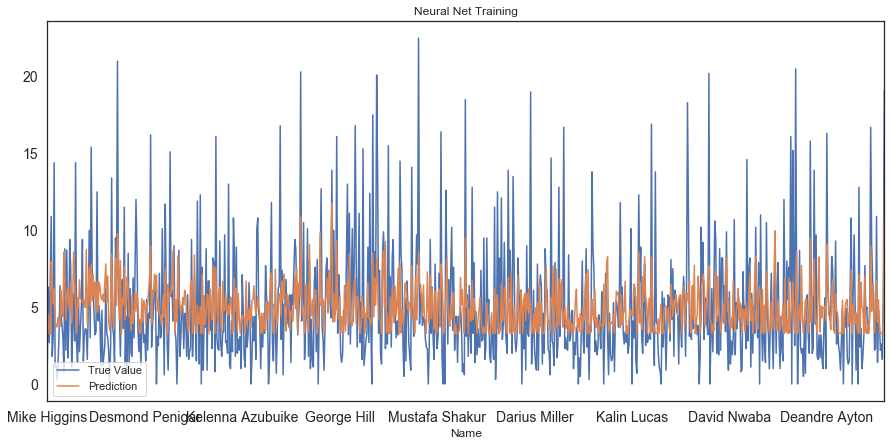

adj train r^2 = 0.18309808288904805
train mse = 11.624301506961807


In [71]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

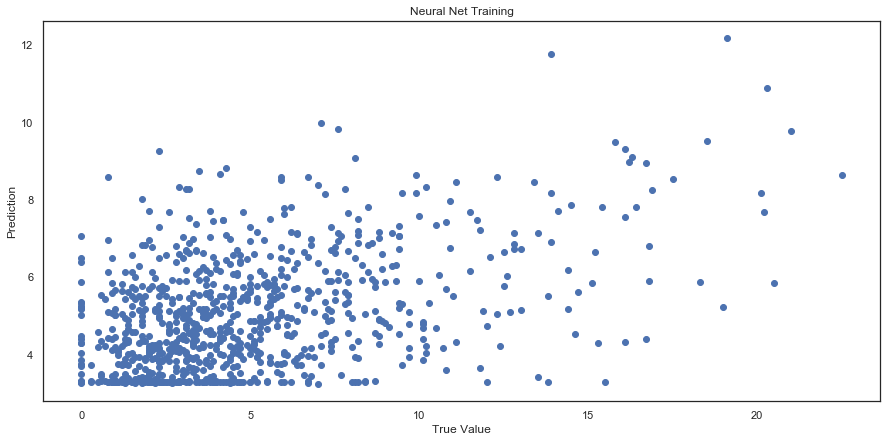

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(train_y2['NBAPTS'],train_y2['prediction'])
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.title("Neural Net Training")
plt.show()

In [75]:
test_y2_BACKUP = test_y2

In [77]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,Age,Fouls,C,PG,SF,SG,PF,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,,,,,,,,
Zion Williamson,NaN,-0.176639,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,6.206818,2.357647,1.070475,0.812397,13.016397,29.649666
Bol Bol,NaN,-0.980254,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,4.908311,1.053412,0.544461,0.807240,9.349454,20.874649
Tremont Waters,NaN,-0.176639,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,1.796810,3.309309,0.960819,0.122729,7.501970,17.872747
Shamorie Ponds,NaN,-0.779350,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,2.114486,2.461485,0.839913,0.122731,8.236223,17.353764
Darius Garland,NaN,-1.582965,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,2.882074,1.957384,0.565336,0.310092,8.078552,17.099400
Coby White,NaN,-0.578446,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,2.212074,2.245200,0.607526,0.194199,7.753123,16.180588
Devon Dotson,NaN,0.626976,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,2.643106,2.085639,0.711305,0.237273,7.006917,16.152834
Romeo Langford,NaN,-0.578446,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,3.021990,1.336622,0.474800,0.369937,7.792563,15.958096
Bruno Fernando,NaN,1.229687,-0.32242,-0.512127,-0.429235,-0.556463,-0.478467,4.424222,0.843151,0.447686,0.622877,6.019136,15.804616


In [79]:
test_y2 = test_y2.drop(['Age','Fouls','C','PG','SF','SG','PF'], axis=1)


In [81]:
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.206818,2.357647,1.070475,0.812397,13.016397,29.649666
Bol Bol,4.908311,1.053412,0.544461,0.807240,9.349454,20.874649
Tremont Waters,1.796810,3.309309,0.960819,0.122729,7.501970,17.872747
Shamorie Ponds,2.114486,2.461485,0.839913,0.122731,8.236223,17.353764
Darius Garland,2.882074,1.957384,0.565336,0.310092,8.078552,17.099400
Coby White,2.212074,2.245200,0.607526,0.194199,7.753123,16.180588
Devon Dotson,2.643106,2.085639,0.711305,0.237273,7.006917,16.152834
Romeo Langford,3.021990,1.336622,0.474800,0.369937,7.792563,15.958096
Bruno Fernando,4.424222,0.843151,0.447686,0.622877,6.019136,15.804616


In [82]:
test_y2.to_csv('RookiePredictions.csv')

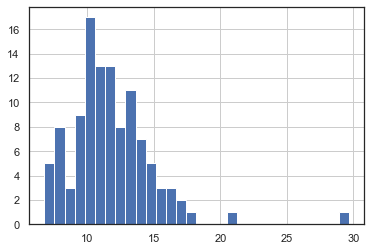

Value Distribution in Draft


In [83]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')